In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
from scipy.ndimage import label
import os
import random
# Venv namesten


In [2]:
# Get training and other data
raw = os.listdir("./data/dataset/images")

random.shuffle(raw)

raw_train = raw[0:2800]
raw_test = raw[2801:3063]

# Choose train data and remember it
writeStr = ""
for item in raw_train:
    writeStr+=item.split("/")[-1].replace(".png","")+","
print(writeStr)

f = open("./data/train.csv","w")
f.write(writeStr)
f.close()

# Choose test data and remember it
writeStr = ""
for item in raw_test:
    writeStr+=item.split("/")[-1].replace(".png","")+","
print(writeStr)

f = open("./data/test.csv","w")
f.write(writeStr)
f.close()


1256,1284,930,146,2129,1967,1348,1352,1401,3024,2718,1128,287,1073,2841,1662,2764,1704,573,2378,1466,1721,932,2782,1207,1464,2675,1714,2451,2728,150,2831,461,1297,784,459,2635,154,2716,2092,1110,476,1368,2516,1746,720,2210,315,2232,332,432,504,2266,2204,808,2888,2276,2840,888,2294,706,1958,2704,2481,1393,2632,2336,1382,304,954,1577,1452,863,367,2630,1086,1853,2095,426,114,225,2678,1449,74,2382,2161,2438,219,1212,2720,2087,2739,449,2680,102,1772,1011,239,1862,480,302,1735,2839,2566,390,1783,1859,605,1078,602,1798,1483,1411,1468,2679,2594,2269,1588,2918,1507,162,469,2065,2975,959,555,2083,355,553,740,2231,113,2424,2284,2998,608,2169,2893,1555,509,295,1216,2719,1710,895,3056,2158,2136,750,2321,1227,2412,51,1549,2734,1769,1477,356,226,633,2464,19,606,1895,702,1852,1641,2281,1726,1143,1177,2202,1108,546,2260,535,1249,126,1760,982,283,1405,178,2665,216,1922,2142,1536,2400,88,2264,56,374,1004,1663,1045,313,1692,2794,1892,1983,2902,271,618,1257,419,158,2427,2726,2565,1381,2021,2018,552,2618,12

In [ ]:
# Accuracy - output images vs mask image - false positive % and false negative %%!
# Get average tumor size, also max and min tumor
# Tumor heatmap - if not on heatmap, then probably not tumor
# 
# 1. Check symmetry differences
# 2. Cancel out whites not on the heatmap
# 3. If a part has the largest connected white cluster , probably the tumor
# 4. Check if circle-like (Optional)

def getTumorHeatmap():
    # imgs are 512 by 512
    heatmap = np.zeros(shape=[512,512,1],dtype=np.uint64)
    
    # only get Train data
    
    f = open("./data/train.csv","r")
    files = f.readline().split(",")
    f.close()
    
    
    for file in files:
        img = cv2.imread(f"./data/dataset/masks/{file}.png",cv2.IMREAD_GRAYSCALE)
        img = img.astype('float32') / 255.0
        print(file)
        heatmap = heatmap+img
 
        if int(file)%20==0:
            print(heatmap.max())
    return heatmap

ht = getTumorHeatmap()
print(ht[200,200,0])

1256
1284
930
146
2129
1967
1348
1352
1401
3024
2718
1128
287


ValueError: operands could not be broadcast together with shapes (512,512,512) (256,256) 

/tmp/ipykernel_2824/2051254359.py:24: RuntimeWarning: invalid value encountered in scalar divide
  dif1 = left_val/right_val
/tmp/ipykernel_2824/2051254359.py:25: RuntimeWarning: invalid value encountered in scalar divide
  dif2 = right_val/left_val
/tmp/ipykernel_2824/2051254359.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  dif2 = right_val/left_val
/tmp/ipykernel_2824/2051254359.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  dif1 = left_val/right_val


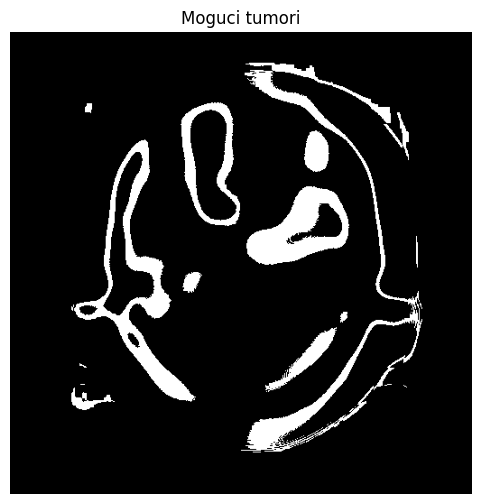

In [ ]:

img_path = './data/dataset/images/2.png'
img = Image.open(img_path).convert('L')  # grayscale

#blur
blurred_img = img.filter(ImageFilter.GaussianBlur(radius=10))
img_array = np.array(blurred_img).astype(np.float32)


height, width = img_array.shape
half_width = width // 2

asymmetry_mask = np.zeros_like(img_array, dtype=np.uint8)

for y in range(height):
    for x in range(half_width):
        left_val = img_array[y, x]
        right_val = img_array[y, width - 1 - x]  


        
        top = 1.55
        bot = 1.1
        
        dif1 = left_val/right_val
        dif2 = right_val/left_val
        if dif1 > bot and dif1<top:
            asymmetry_mask[y, x] = 1
        if dif2 > bot and dif2<top:
            asymmetry_mask[y, width - 1 - x] = 1


plt.figure(figsize=(6, 6))
plt.imshow(asymmetry_mask, cmap='gray')
plt.axis('off')
plt.title("Moguci tumori")
plt.show()